# Task 2

In [21]:
import numpy as np
import tensorflow
import matplotlib.pyplot as plt
import pandas as pd

from tensorflow.keras.layers import  Dense, Flatten 
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential 
from sklearn.utils import shuffle 
from tensorflow.keras.models import model_from_json

### Load data

In [2]:
spam_data = pd.read_csv('spambase.csv', header = None)
spam_data = shuffle(spam_data,random_state = 32)
spam_data

0     1     2    3     4     5    6     7     8     9   ...     48  \
3586  0.00  0.00  0.00  0.0  0.00  0.00  0.0  0.00  0.00  0.00  ...  0.000   
615   0.00  0.00  0.90  0.0  0.45  0.00  0.0  0.00  0.00  0.00  ...  0.000   
831   0.18  0.00  0.09  0.0  0.36  0.09  0.0  0.36  0.09  0.00  ...  0.000   
2167  0.90  0.00  0.90  0.0  0.00  0.00  0.0  0.00  0.00  0.00  ...  0.000   
360   0.00  0.00  0.00  0.0  0.00  0.00  0.0  0.00  0.00  0.00  ...  0.000   
...    ...   ...   ...  ...   ...   ...  ...   ...   ...   ...  ...    ...   
4030  0.00  0.00  0.00  0.0  0.00  0.00  0.0  0.00  0.00  0.00  ...  0.000   
2940  0.05  0.00  0.45  0.0  0.15  0.10  0.0  0.00  0.55  0.00  ...  0.203   
1334  0.00  0.00  0.00  0.0  0.00  0.00  0.0  0.00  0.00  3.77  ...  0.264   
1579  0.13  0.13  0.26  0.0  0.26  0.26  0.0  0.13  0.39  0.13  ...  0.000   
2775  0.00  0.00  0.00  0.0  0.00  0.00  0.0  0.00  0.00  0.84  ...  0.000   

         49     50     51     52     53     54  55    56  57  
3586  0.000  0.000  0.000  0.000  0.000  1.000   1     5   0  
615   0.000  0.000  2.115  0.070  0.000  2.651  14   114   1  
831   0.060  0.030  0.030  0.015  0.000  4.192  48   566   1  
2167  0.112  0.000  0.225  0.000  0.000  1.807  10    47   0  
360   0.000  0.000  5.000  0.000  0.000  1.000   1     2   1  
...     ...    ...    ...    ...    ...    ...  ..   ...  ..  
4030  0.000  0.000  0.000  0.000  0.000  3.250  10    13   0  
2940  0.195  0.050  0.000  0.014  0.000  2.880  45  1080   0  
1334  0.000  0.000  0.000  0.000  0.000  4.333  13    78   1  
1579  0.137  0.000  0.000  0.068  0.000  2.736  30   468   1  
2775  0.000  0.137  0.413  0.000  0.137  3.052  13   116   0  

[4601 rows x 58 columns]

### Split the data in training, evalatuation and testing data

    - TRAINING DATA (60%) :  920 IMAGES
    - EVALUATION DATA (20%) : 920  IMAGES
    - TESTING DATA (20%) : 2761 IMAGES 

In [3]:
coef_test = 0.2
coef_eval = 0.2

### Load_spam_data

In [4]:
def load_spam_data(spam_data,coef_test,coef_eval):
    

    
    # RANDOMIZE THE DATA BECAUSE IS ORGANIZE AND TENSORIZE THE DATA 
    
    spam_data = spam_data.values
    
    x_spam_data = spam_data[:,0:56]
    y_spam_data = spam_data[:,57]
    
    num_data = len(x_spam_data)
    num_data_test = round (num_data * coef_test)
    num_data_eval = round (num_data * coef_eval)
        
    
    # TEST DATA: DIVIDE FROM THE DATA 

    x_spam_data_test = x_spam_data[num_data - num_data_test:,:]
    y_spam_data_test = y_spam_data[num_data - num_data_test:]
    
    # TRAIN DATA: FIRST NORMALIZE AND THEN DIVIDE IN EVALUATION AND TRAINING DATA
    
    x_spam_data_train = x_spam_data[0:num_data - num_data_test,:]
    y_spam_data_train = y_spam_data[0:num_data - num_data_test]
    x_spam_data_train_mean = x_spam_data_train.mean(axis = 0)
    x_spam_data_train -= x_spam_data_train_mean
    x_spam_data_train_std = x_spam_data_train.std(axis = 0)
    x_spam_data_train /= x_spam_data_train_std
    
    x_spam_data_eval = x_spam_data_train[len(x_spam_data_train) - num_data_eval:len(x_spam_data_train),:]
    y_spam_data_eval = y_spam_data_train[len(x_spam_data_train) - num_data_eval:len(x_spam_data_train)]
    m = len(x_spam_data_train)
    x_spam_data_train = x_spam_data_train[0:m - num_data_eval,:]
    y_spam_data_train = y_spam_data_train[0:m - num_data_eval]
    
    # NORMALIZE A THE TEST DATA
    
    x_spam_data_test -= x_spam_data_train_mean
    x_spam_data_test /= x_spam_data_train_std
    
    return x_spam_data_test,y_spam_data_test,x_spam_data_eval,y_spam_data_eval,x_spam_data_train,y_spam_data_train

In [5]:
x_spam_data_test,y_spam_data_test,x_spam_data_eval,y_spam_data_eval,x_spam_data_train,y_spam_data_train = load_spam_data(spam_data,coef_test,coef_eval)

### Models

In [6]:
model_name = 'Model 1'

num_clas_2 = 16
num_clas_3 = 8
num_clas_4 = 1

model1 = Sequential()
model1.add(Flatten())
model1.add(Dense(num_clas_2, activation='relu')) 
model1.add(Dense(num_clas_3, activation='relu')) 
model1.add(Dense(num_clas_4, activation='sigmoid')) 

In [7]:
y_spam_data_train.shape


(2761,)

In [8]:
model_name = 'Model 2'


num_clas_1 = 32
num_clas_2 = 16
num_clas_5 = 1

model2 = Sequential()
model2.add(Flatten())
model2.add(Dense(num_clas_1, activation='relu')) 
model2.add(Dense(num_clas_2, activation='relu'))  
model2.add(Dense(num_clas_5, activation='sigmoid')) 

In [9]:
model_name = 'Model 3'


num_clas_2 = 32
num_clas_3 = 32
num_clas_4 = 16
num_clas_5 = 8
num_clas_6 = 1

model3 = Sequential()
model3.add(Flatten()) 
model3.add(Dense(num_clas_2, activation='relu')) 
model3.add(Dense(num_clas_3, activation='relu')) 
model3.add(Dense(num_clas_4, activation='relu')) 
model3.add(Dense(num_clas_5, activation='relu')) 
model3.add(Dense(num_clas_6, activation='sigmoid')) 

In [10]:
model1.compile(loss = 'binary_crossentropy', optimizer = "adam", metrics=['accuracy']) 
model2.compile(loss = 'binary_crossentropy', optimizer = "adam", metrics=['accuracy'])
model3.compile(loss = 'binary_crossentropy', optimizer = "adam", metrics=['accuracy'])

### Training data

In [11]:
history1 = model1.fit(x_spam_data_train, y_spam_data_train, validation_data = (x_spam_data_eval,y_spam_data_eval), epochs = 32)
history2 = model2.fit(x_spam_data_train, y_spam_data_train, validation_data = (x_spam_data_eval,y_spam_data_eval), epochs = 32)
history3 = model3.fit(x_spam_data_train, y_spam_data_train, validation_data = (x_spam_data_eval,y_spam_data_eval), epochs = 64, batch_size=256)

Train on 2761 samples, validate on 920 samples
Epoch 1/32
2761/2761 [==============================] - 2s 684us/sample - loss: 0.6288 - accuracy: 0.7208 - val_loss: 0.5455 - val_accuracy: 0.8000
Epoch 2/32
2761/2761 [==============================] - 0s 95us/sample - loss: 0.4790 - accuracy: 0.8301 - val_loss: 0.4183 - val_accuracy: 0.8630
Epoch 3/32
2761/2761 [==============================] - 0s 108us/sample - loss: 0.3572 - accuracy: 0.8830 - val_loss: 0.3078 - val_accuracy: 0.8913
Epoch 4/32
2761/2761 [==============================] - 0s 89us/sample - loss: 0.2772 - accuracy: 0.9152 - val_loss: 0.2520 - val_accuracy: 0.9152
Epoch 5/32
2761/2761 [==============================] - 0s 89us/sample - loss: 0.2377 - accuracy: 0.9247 - val_loss: 0.2263 - val_accuracy: 0.9196
Epoch 6/32
2761/2761 [==============================] - 0s 92us/sample - loss: 0.2168 - accuracy: 0.9294 - val_loss: 0.2140 - val_accuracy: 0.9185
Epoch 7/32
2761/2761 [==============================] - 0s 88us/sampl

2761/2761 [==============================] - 1s 290us/sample - loss: 0.1015 - accuracy: 0.9634 - val_loss: 0.1769 - val_accuracy: 0.9413
Epoch 24/32
2761/2761 [==============================] - 1s 243us/sample - loss: 0.0981 - accuracy: 0.9681 - val_loss: 0.1767 - val_accuracy: 0.9402
Epoch 25/32
2761/2761 [==============================] - 1s 245us/sample - loss: 0.0963 - accuracy: 0.9699 - val_loss: 0.1819 - val_accuracy: 0.9402
Epoch 26/32
2761/2761 [==============================] - 1s 460us/sample - loss: 0.0929 - accuracy: 0.9696 - val_loss: 0.1811 - val_accuracy: 0.9413
Epoch 27/32
2761/2761 [==============================] - 1s 323us/sample - loss: 0.0920 - accuracy: 0.9710 - val_loss: 0.1810 - val_accuracy: 0.9402
Epoch 28/32
2761/2761 [==============================] - 1s 220us/sample - loss: 0.0892 - accuracy: 0.9703 - val_loss: 0.1815 - val_accuracy: 0.9435
Epoch 29/32
2761/2761 [==============================] - 1s 265us/sample - loss: 0.0879 - accuracy: 0.9717 - val_loss:

2761/2761 [==============================] - 0s 72us/sample - loss: 0.0765 - accuracy: 0.9779 - val_loss: 0.1892 - val_accuracy: 0.9402
Epoch 47/64
2761/2761 [==============================] - 0s 77us/sample - loss: 0.0750 - accuracy: 0.9775 - val_loss: 0.1912 - val_accuracy: 0.9424
Epoch 48/64
2761/2761 [==============================] - 0s 71us/sample - loss: 0.0734 - accuracy: 0.9797 - val_loss: 0.1929 - val_accuracy: 0.9413
Epoch 49/64
2761/2761 [==============================] - 0s 73us/sample - loss: 0.0724 - accuracy: 0.9794 - val_loss: 0.1984 - val_accuracy: 0.9359
Epoch 50/64
2761/2761 [==============================] - 0s 71us/sample - loss: 0.0708 - accuracy: 0.9804 - val_loss: 0.1947 - val_accuracy: 0.9391
Epoch 51/64
2761/2761 [==============================] - 0s 72us/sample - loss: 0.0683 - accuracy: 0.9812 - val_loss: 0.1999 - val_accuracy: 0.9391
Epoch 52/64
2761/2761 [==============================] - 0s 73us/sample - loss: 0.0669 - accuracy: 0.9826 - val_loss: 0.2006

### Plots

In [12]:
# Plot accuracy vs epochs
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# Plot loss vs epochs
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

print( 'Training accuracy:    ', history1.history['accuracy'][-1] )
print( 'Validation accuracy:    ', history1.history['val_accuracy'][-1] )

Training accuracy:     0.96124595
Validation accuracy:     0.9369565


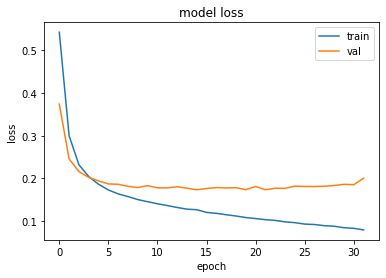

Training accuracy:     0.9750091
Validation accuracy:     0.9413043


In [13]:
# Plot accuracy vs epochs
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# Plot loss vs epochs
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

print( 'Training accuracy:    ', history2.history['accuracy'][-1] )
print( 'Validation accuracy:    ', history2.history['val_accuracy'][-1] )

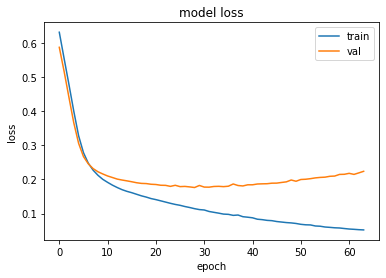

Training accuracy:     0.9865991
Validation accuracy:     0.9423913
Training accuracy:     0.05186350999837853
Validation accuracy:     0.22391998327296714


In [14]:
# Plot accuracy vs epochs
plt.plot(history3.history['accuracy'])
plt.plot(history3.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# Plot loss vs epochs
plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

print( 'Training accuracy:    ', history3.history['accuracy'][-1] )
print( 'Validation accuracy:    ', history3.history['val_accuracy'][-1] )
print( 'Training accuracy:    ', history3.history['loss'][-1] )
print( 'Validation accuracy:    ', history3.history['val_loss'][-1] )

### Testing

In [15]:
score1 = model1.evaluate(x_spam_data_test,y_spam_data_test)
score2 = model2.evaluate(x_spam_data_test,y_spam_data_test)
score3 = model3.evaluate(x_spam_data_test,y_spam_data_test)

920/1 [=================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

920/1 [=================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

920/1 [=================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [16]:
print ('MODEL 1')
print( 'Testing Loss:    ', score1[0] )
print( 'Testing accuracy:    ', score1[1] )

print ('MODEL 2')
print( 'Testing Loss:    ', score2[0] )
print( 'Testing accuracy:    ', score2[1] )

print ('MODEL 3')
print( 'Testing Loss:    ', score3[0] )
print( 'testing accuracy:    ', score3[1] )

MODEL 1
Testing Loss:     0.16037292499905048
Testing accuracy:     0.9413043
MODEL 2
Testing Loss:     0.16811824350253396
Testing accuracy:     0.9402174
MODEL 3
Testing Loss:     0.2365582182355549
testing accuracy:     0.9402174


### Save

In [17]:
# serialize model to JSON
model_json = model3.to_json()
with open("model_Task2.json", "w") as json_file:
    json_file.write(model_json)
    
# serialize weights to HDF5
model3.save_weights("model_Task2.h5")
print("Saved model to disk")

Saved model to disk


### Load

In [23]:
# load json and create model
json_file = open('model_Task2.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
model = model_from_json(loaded_model_json)
# load weights into new model
model3.load_weights("model_Task2.h5")
model3.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])